# <font color='blue'></font>

## <font color='blue'>HR Data Analysis</font>

## Installing and Loading Libraries

In [1]:
# Python Language Version
from platform import python_version
print('Python Language Version Used in this Jupyter Notebook:', python_version())

Python Language Version Used in this Jupyter Notebook: 3.9.7


In [3]:
!pip install -q missingno

In [4]:
!pip install -q category_encoders

In [5]:
!pip install -q plotly

In [6]:
# Imports

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Statistics
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Loading Data

In [8]:
# Load dataset
df = pd.read_csv("dataset/aug_train.csv")

In [9]:
# Shape
df.shape

(19158, 14)

In [10]:
# Columns
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [11]:
# Sample of the data
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [12]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Exploratory Data Analysis

In [13]:
# Describing the non-numerical data
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [14]:
# Describing the numerical data
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* In **city_development_index** (CDI), the mean values are 0.828, median 0.903 and std 0.123. This means that most of the candidates are from well-developed cities.


* In **training_hours**, the mean values are 65.367, median 47 and max 336. This means that there are more candidates with few hours of training, but some candidates spend a lot of time to do the training.

### Viewing the Categorical Variables

In [15]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

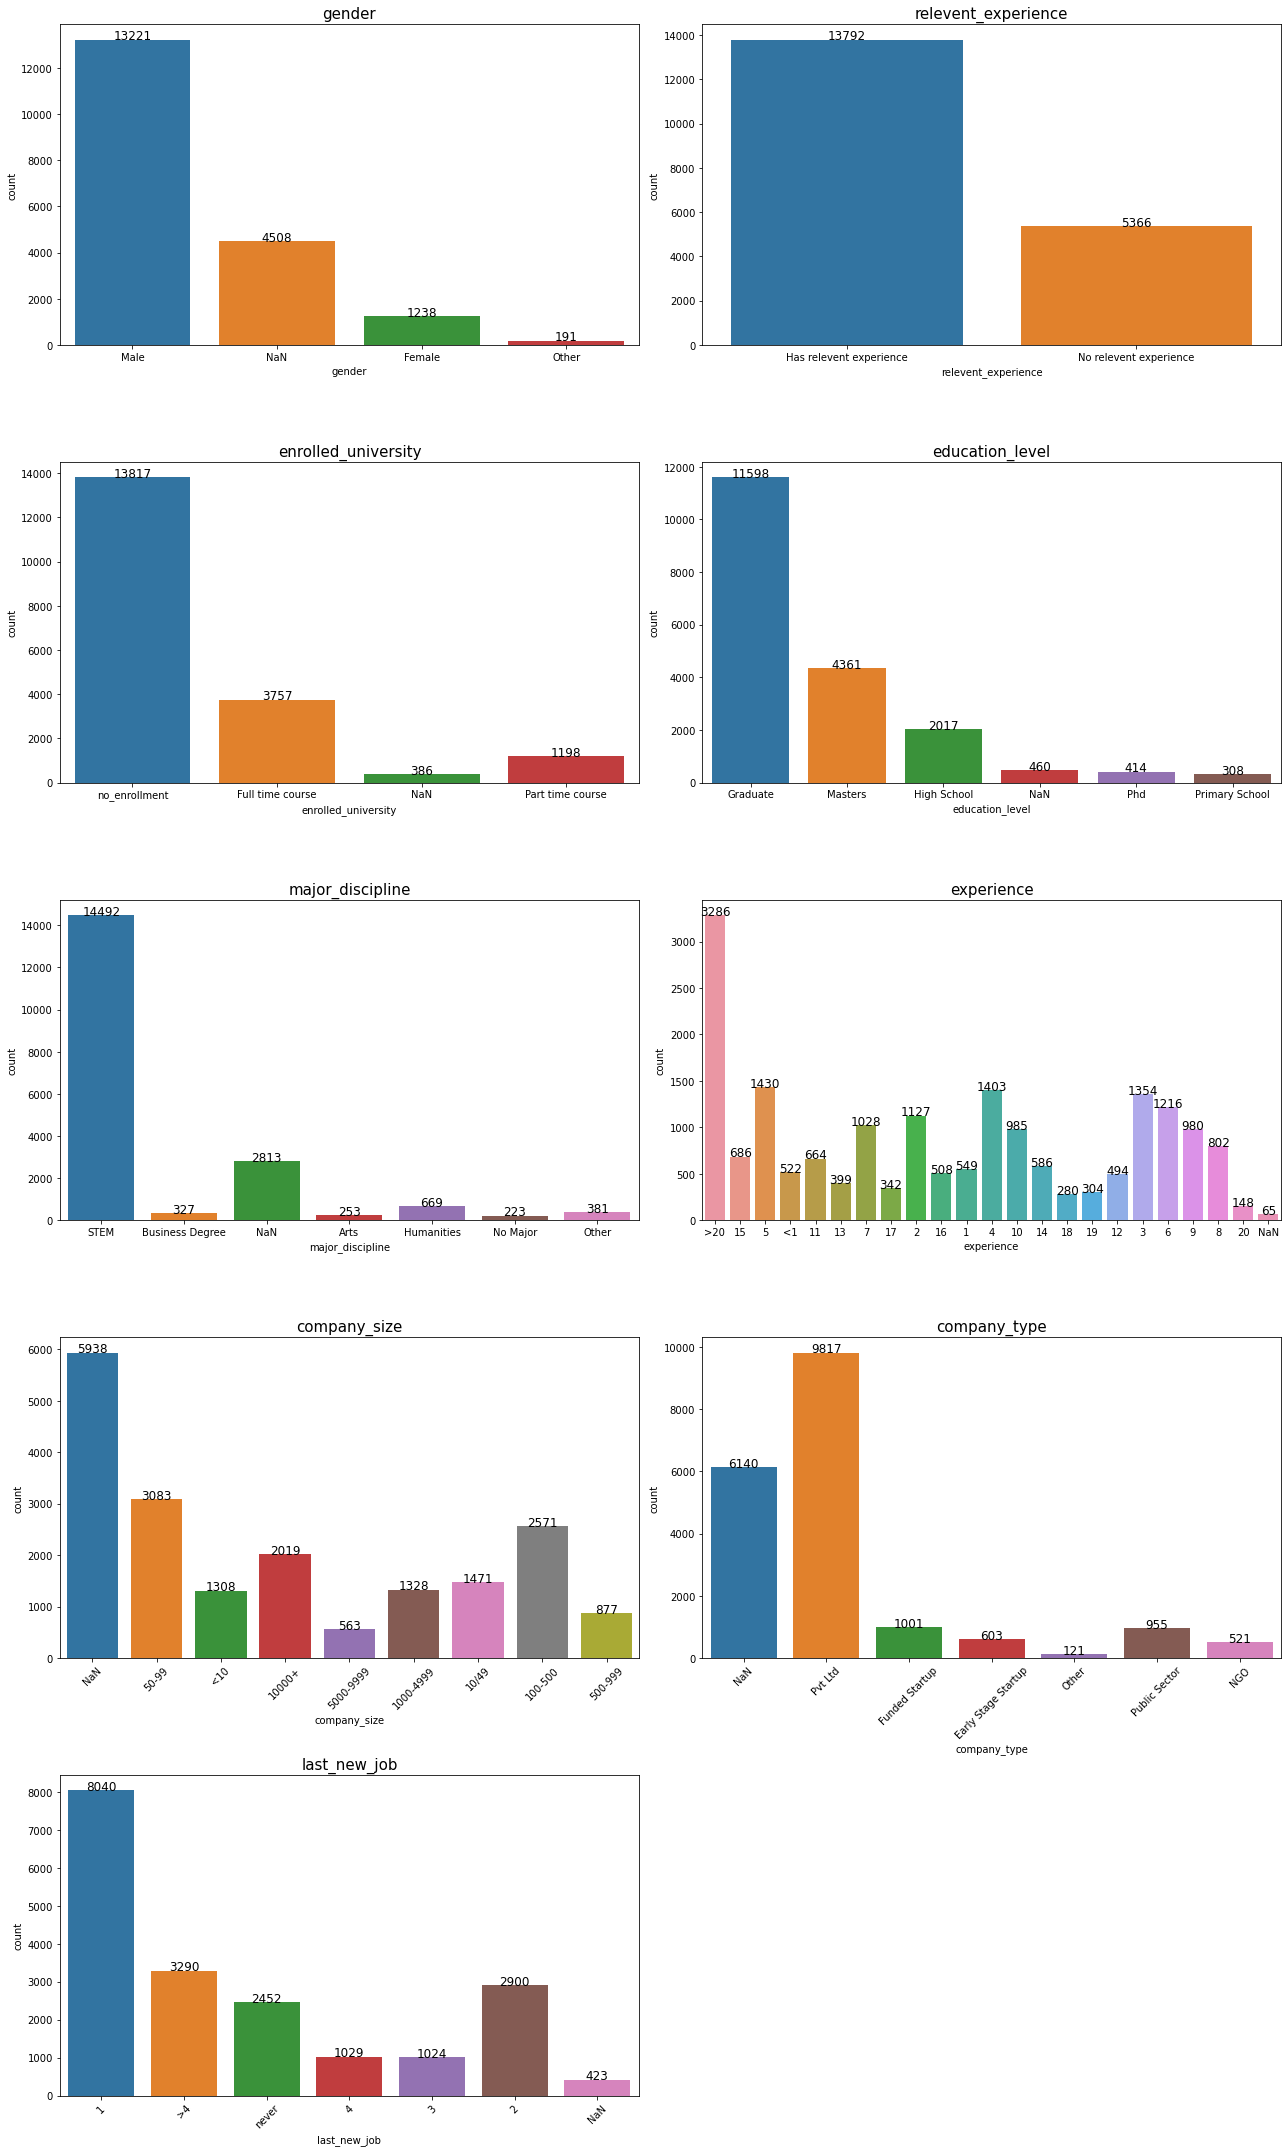

In [16]:
# Plot

# Figure size
plt.figure(figsize = (18,30))

# List of columns
column_list = list(df.columns.values)[3:12]

# Counter
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Checking the Distribution of Numeric Variables

In [17]:
# Describing the numerical data
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


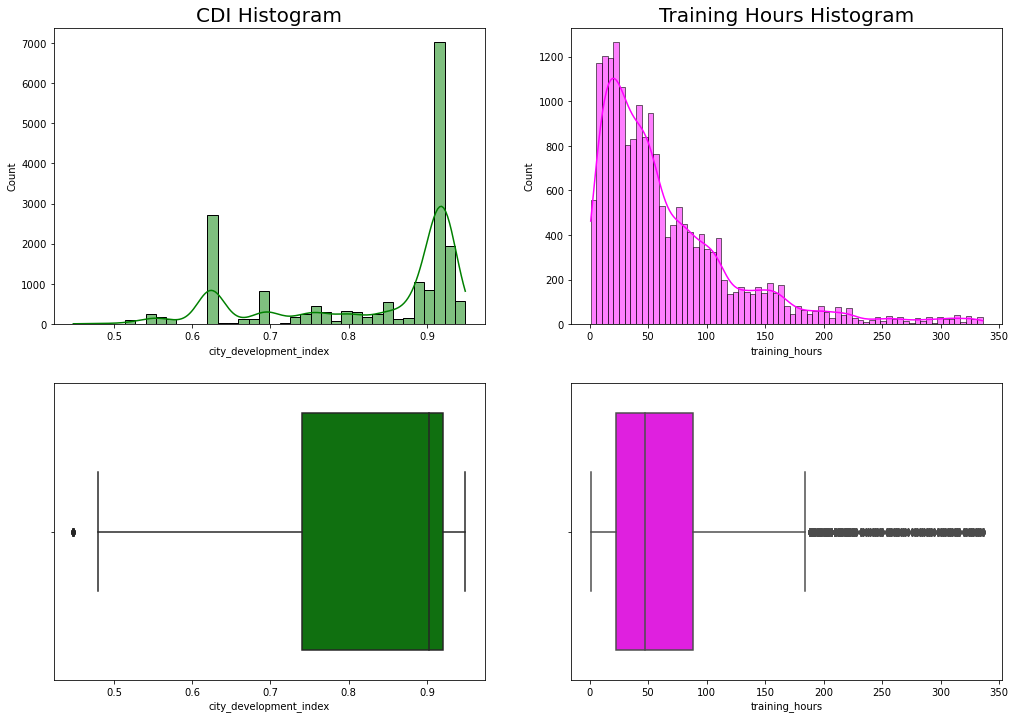

In [18]:
# Figure
plt.figure(figsize = (17,12))

# Subplots with histograms
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('CDI Histogram', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Training Hours Histogram', fontsize = 20)

# Subplots with boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

In [19]:
# Distribution Normality Test

# List with numerical variables
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calculate normality
    stats, pval = normaltest(df[i])
    
     # Check p-value
    if pval > 0.05:
        print(i, ': Normal Distribution')
    else:
        print(i, ': Non-Normal Distribution')

city_development_index : Non-Normal Distribution
training_hours : Non-Normal Distribution


* The variables **city_development_index** and **training_hours** do not follow the normal distribution. For the numerical analysis, we will use the non-parametric method.


* The data of **training_hours** are located mostly on the left side of the histogram. This is expected behavior because people usually get excited about training at the beginning, but not everyone who starts can finish a marathon. ;-)

### Data Correlation

#### Spearman's Correlation Between Numeric Variables

The correlation between the numerical variables and between the numerical variables and the target variable (what we want to analyze) were analyzed.

In [20]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
# A  copy of the original dataframe was created
df_numerical = df.copy()

In [23]:
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [24]:
# The experience variable was converted to numeric
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [25]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [26]:
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [27]:
# The last_new_job variable was converted to numeric
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [28]:
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [29]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [30]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [31]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


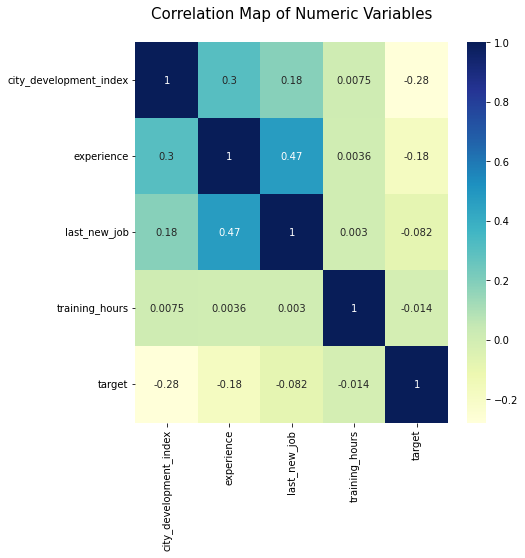

In [32]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Correlation Map of Numeric Variables\n", fontsize = 15)
plt.show()

By spearman correlation, last_new_job and experience have medium correlation (0.473), while others have weak correlation.

The variables last_new_job and training_hours have close to zero correlation with the target variable and could be dropped.

For the relationship between the categorical variables and the target variable, we will use WOE and IV.

### Weight of Evidence (WOE) and Information Value (IV)

This dataset contains more data with categorical type than numerical type. We will use nominal categorical features for WOE and IV.

The result of IV was interpreted like this:

    Information Value, Predictive Power
    
    < 0.02, should not be used for forecasting
    0.02 - 0.1, weak predictor
    0.1 - 0.3, average predictor
    0.3 - 0.5, strong predictor
    > 0.5, seems too good to be true

In [33]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 720x864 with 0 Axes>

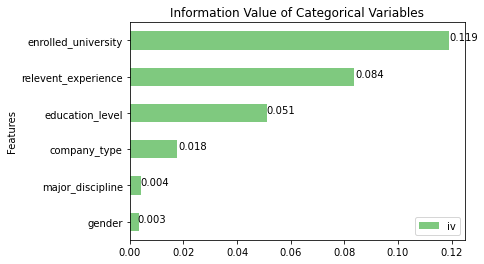

In [34]:
# Information Value Plot

# Categorical variables
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figure
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value of Categorical Variables', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

* In the chart above, we can see the order of the features based on their predictive power relative to the target.
* Based on its IV value, `enrolled_university` is an average predictor, `relevant_experience` and `education_level` are weak predictors and the others are useless for prediction.

### Identifying Missing Values

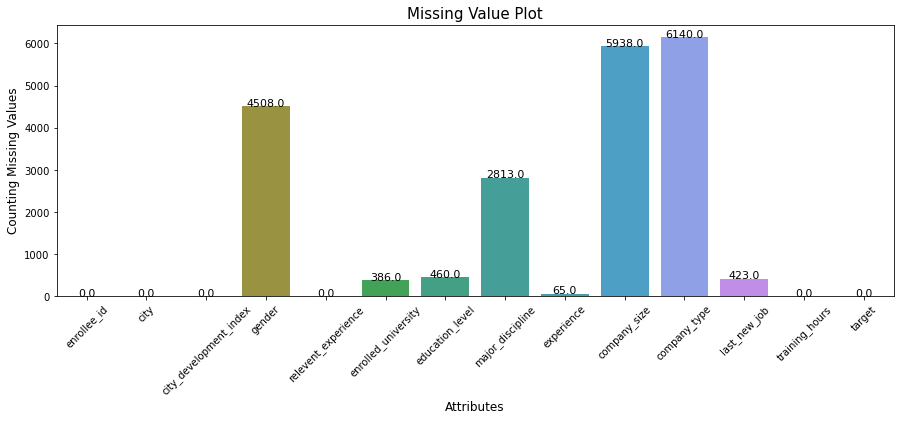

In [35]:
# Missing Values per Column
null_df = df.isna().sum().reset_index()

# Figure
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Attributes', fontsize = 12)
plt.ylabel('Counting Missing Values', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Missing Value Plot", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

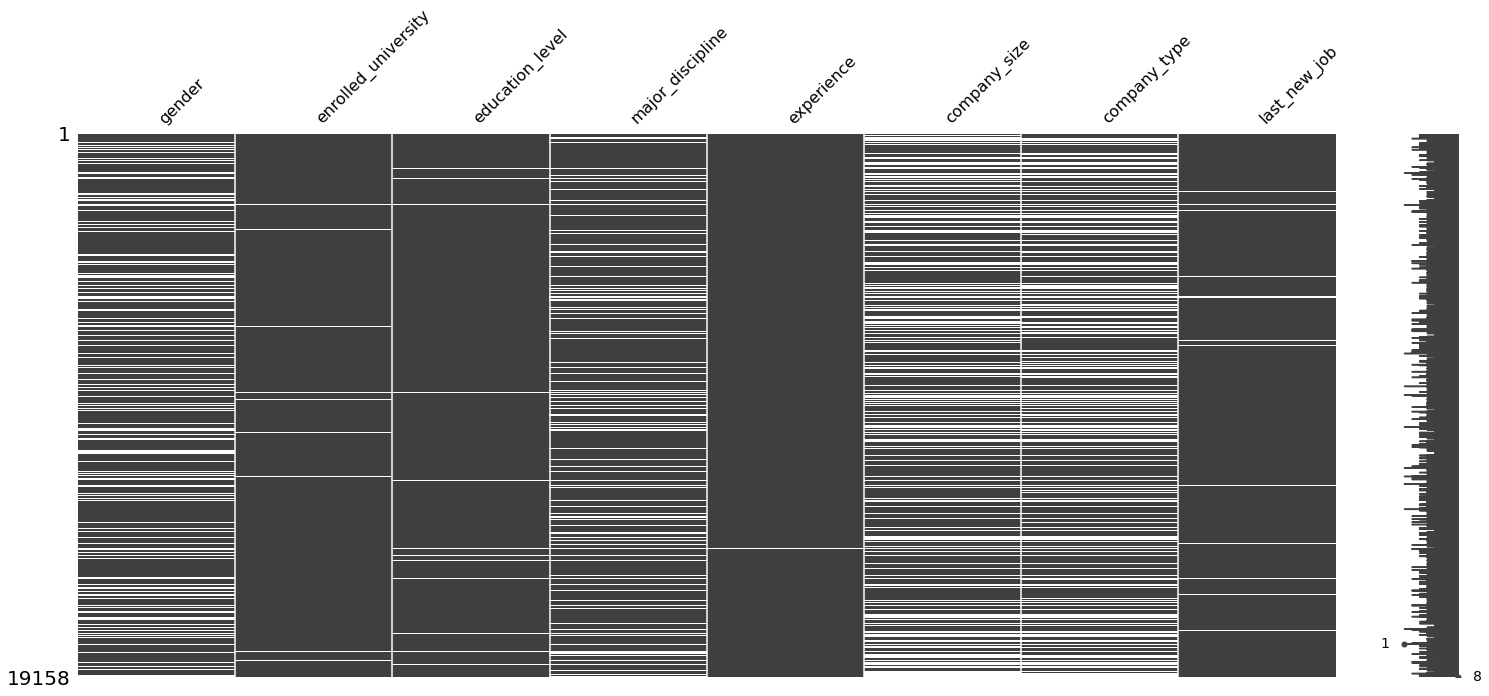

In [36]:
# Generates the visualization

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Missing Values Map
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Missing values in each column have a random pattern.

### Identifying Duplicate Values

In [37]:
# Checking for duplicate values (none)
df['enrollee_id'].duplicated().sum()

0

### Identifying Unbalanced Data

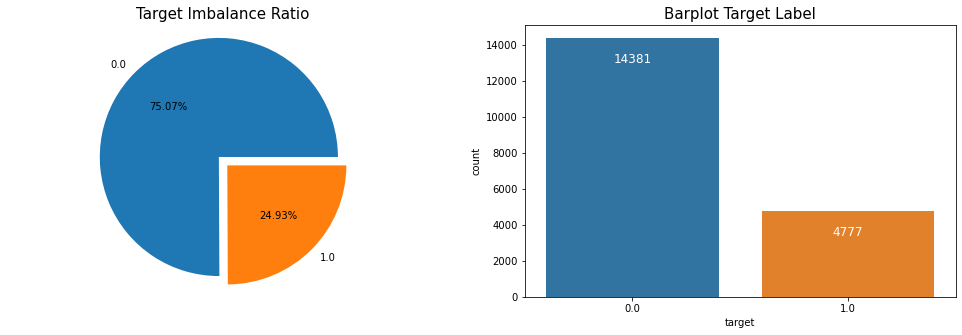

In [38]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

The data is unbalanced with respect to the target variable.

## Data Cleansing and Processing



### Dealing with Missing Values

In [39]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [40]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [41]:
new_df = df[colunas_manter]

In [42]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [43]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


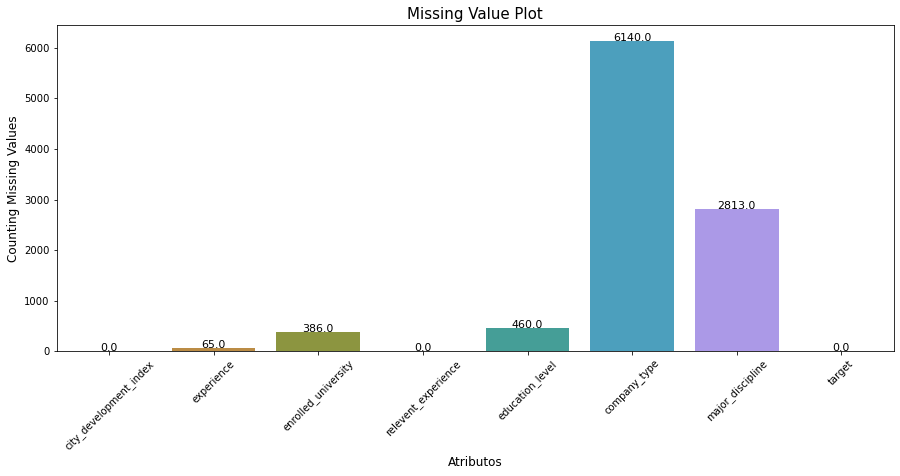

In [44]:
# Missing Values per Column
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Counting Missing Values', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Missing Value Plot", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

#### major_discipline variable

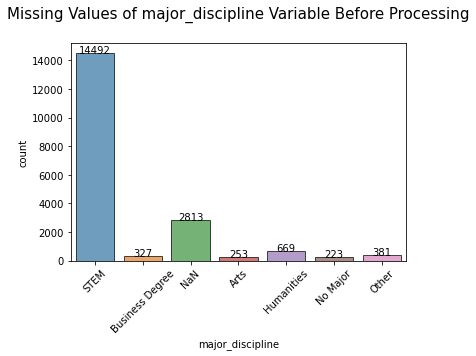

In [45]:
# Missing Values of major_discipline Variable Before Processing
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Missing Values of major_discipline Variable Before Processing\n", fontsize = 15)
plt.show()

In [46]:
# Relationship between major_discipline x education_level
print('\nTotal Missing Values in the major_discipline Variable:', new_df['major_discipline'].isna().sum())
print('\nProportion of Missing Values in the education_level Variable:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total Missing Values in the major_discipline Variable: 2813

Proportion of Missing Values in the education_level Variable:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Among the records with missing values, we see the proportion in the variable education_level.

We will fill the NA values of the `major_discipline` variable with `Non Degree`..

In [47]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [48]:
len(nan_index)

2785

In [49]:
# Imputation of the missing value
new_df['major_discipline'][nan_index] = 'Non Degree'

In [50]:
print('Total of Missing Values in the major_discipline Variable:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total of Missing Values in the major_discipline Variable: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

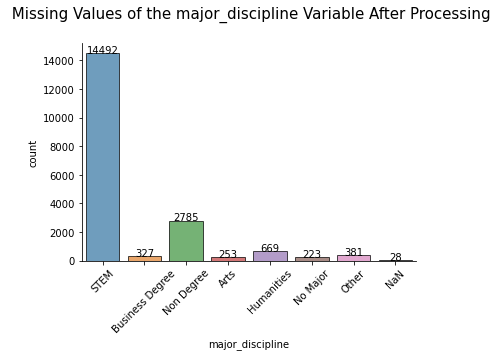

In [51]:
# Missing Values of the major_discipline Variable After Processing
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Missing Values of the major_discipline Variable After Processing\n", fontsize = 15)
plt.show()

In [52]:
# For the remaining missing values we fill in with 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

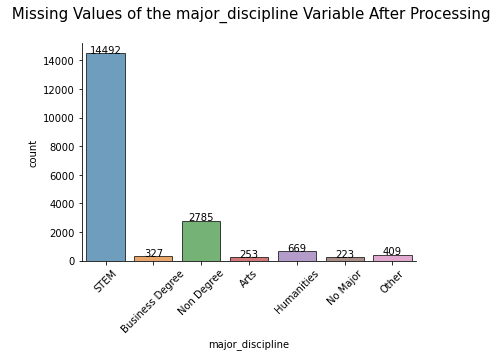

In [53]:
# Missing Values of the major_discipline Variable After Processing
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Missing Values of the major_discipline Variable After Processing\n", fontsize = 15)
plt.show()

In [54]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### enrolled_university variable

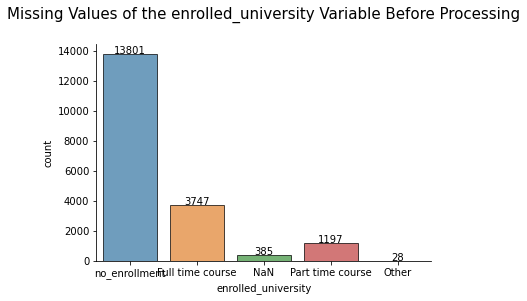

In [55]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Missing Values of the enrolled_university Variable Before Processing\n", fontsize = 15)
plt.show()

In [56]:
print('\nTotal of Missing Values in the enrolled_university variable:', new_df['enrolled_university'].isna().sum())
print('\nProportion of Missing Values in the education_level Variable:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total of Missing Values in the enrolled_university variable: 385

Proportion of Missing Values in the education_level Variable:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Applicants with `Primary School` as `education_level` are not eligible to enter university. Therefore, we will fill in values `NaN` in `education_level` for `Primary Grad`.

In [57]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [58]:
len(nan_index)

9

In [59]:
# Imputation of missing values
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [60]:
print('Total of Missing Values:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total of Missing Values: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [61]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [62]:
# The rest we will fill with 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

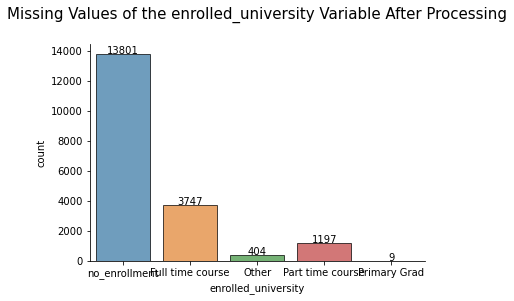

In [63]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Missing Values of the enrolled_university Variable After Processing\n", fontsize = 15)
plt.show()

In [64]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

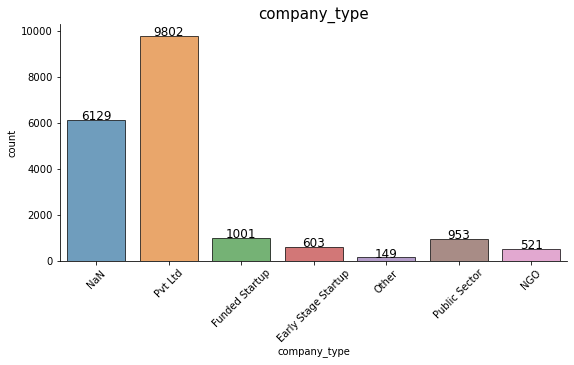

In [65]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [66]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [67]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [68]:
# Imputation of NaN values with 'Other'
new_df['company_type'][nan_index] = 'Other'

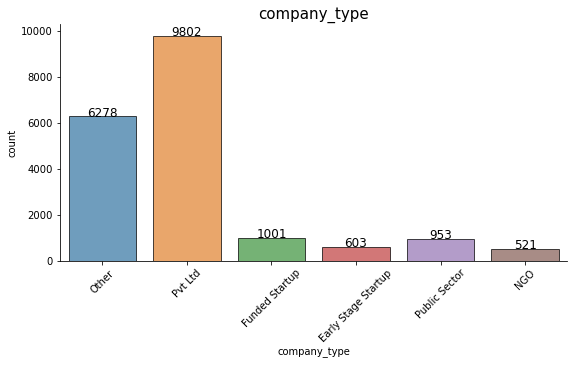

In [69]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [70]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### education_level variable

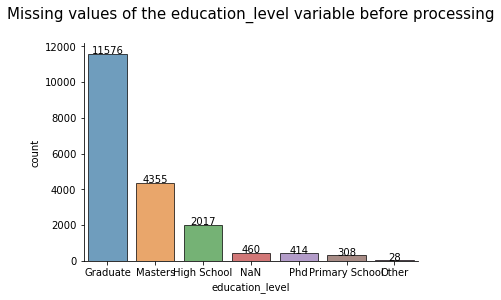

In [71]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Missing values of the education_level variable before processing\n", fontsize = 15)
plt.show()

In [72]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [73]:
# Imputation of NaN values with 'Other'
new_df['education_level'][nan_index] = 'Other'

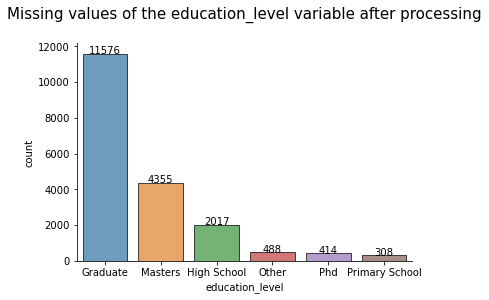

In [74]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Missing values of the education_level variable after processing\n", fontsize = 15)
plt.show()

In [75]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### experience variable

In [76]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [77]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [78]:
# Percentage of missing values
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [79]:
new_df['experience'].isnull().sum()

63

In [80]:
new_df.shape

(19158, 8)

In [81]:
new_df = new_df.dropna()

In [82]:
new_df.shape

(19095, 8)

In [83]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

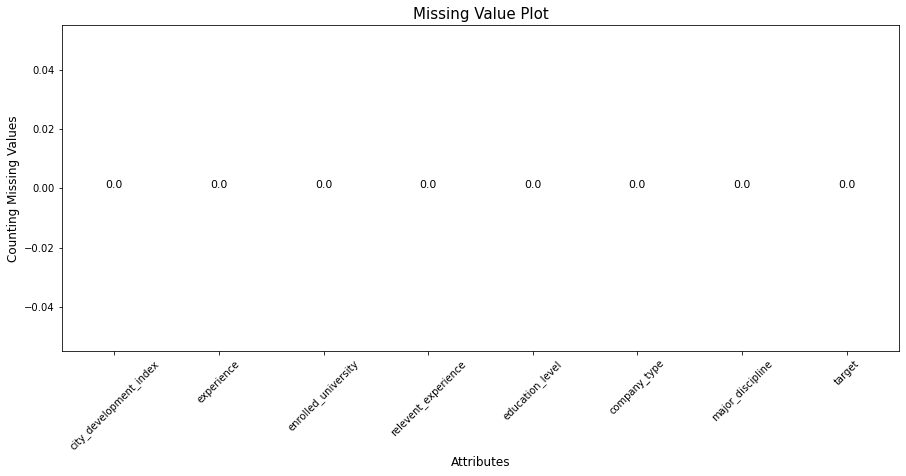

In [84]:
# Missing Values per Column
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Attributes', fontsize = 12)
plt.ylabel('Counting Missing Values', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Missing Value Plot", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Final Adjustments

In [85]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [86]:
# Adjusting the Data
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [87]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [88]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Final Report

Based on our analysis we observed that the most relevant variables to identify a good candidate are:

- Development Index of the city where the candidate lives.
- Professional experience time.
- Whether or not one is enrolled in a university course.
- Whether or not one has relevant experience.
- Educational level.
- The type of company the applicant has worked or currently works for.
- The undergraduate specialization (when applicable).

Not relevant for the analysis:

- The applicant ID.
- The applicant's city code.
- The genre.
- The last time the applicant was employed.
- The size of the company (when applicable).
- Total training hours.


**Recommendations**:

- HR could develop a data collection method to obtain other resources in order to improve the quality of the data and make the analysis work more accurately.

- HR may look for candidates who come from cities with lower urban development index, no relevant experience, higher education level and less work experience to have a better chance of finding candidates who are looking for a job.

- HR could make the training more compact because many people do not need much time to complete the training.

# End